In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
print(os.listdir('../data/leaf_disease/'))
print("No of classes:",len(os.listdir('../data/leaf_disease/')))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tom

In [4]:
root_dir = '../data/leaf_disease'
total_images = 0
for i in os.listdir(root_dir):
    temp_len = len(os.listdir(os.path.join(root_dir, i)))
    total_images += temp_len
    print("Number of images in", i, "class are", temp_len)
print("Total no of in the dataset are", total_images)

Number of images in Apple___Apple_scab class are 630
Number of images in Apple___Black_rot class are 621
Number of images in Apple___Cedar_apple_rust class are 275
Number of images in Apple___healthy class are 1645
Number of images in Background_without_leaves class are 1143
Number of images in Blueberry___healthy class are 1502
Number of images in Cherry___healthy class are 854
Number of images in Cherry___Powdery_mildew class are 1052
Number of images in Corn___Cercospora_leaf_spot Gray_leaf_spot class are 513
Number of images in Corn___Common_rust class are 1192
Number of images in Corn___healthy class are 1162
Number of images in Corn___Northern_Leaf_Blight class are 985
Number of images in Grape___Black_rot class are 1180
Number of images in Grape___Esca_(Black_Measles) class are 1383
Number of images in Grape___healthy class are 423
Number of images in Grape___Leaf_blight_(Isariopsis_Leaf_Spot) class are 1076
Number of images in Orange___Haunglongbing_(Citrus_greening) class are 

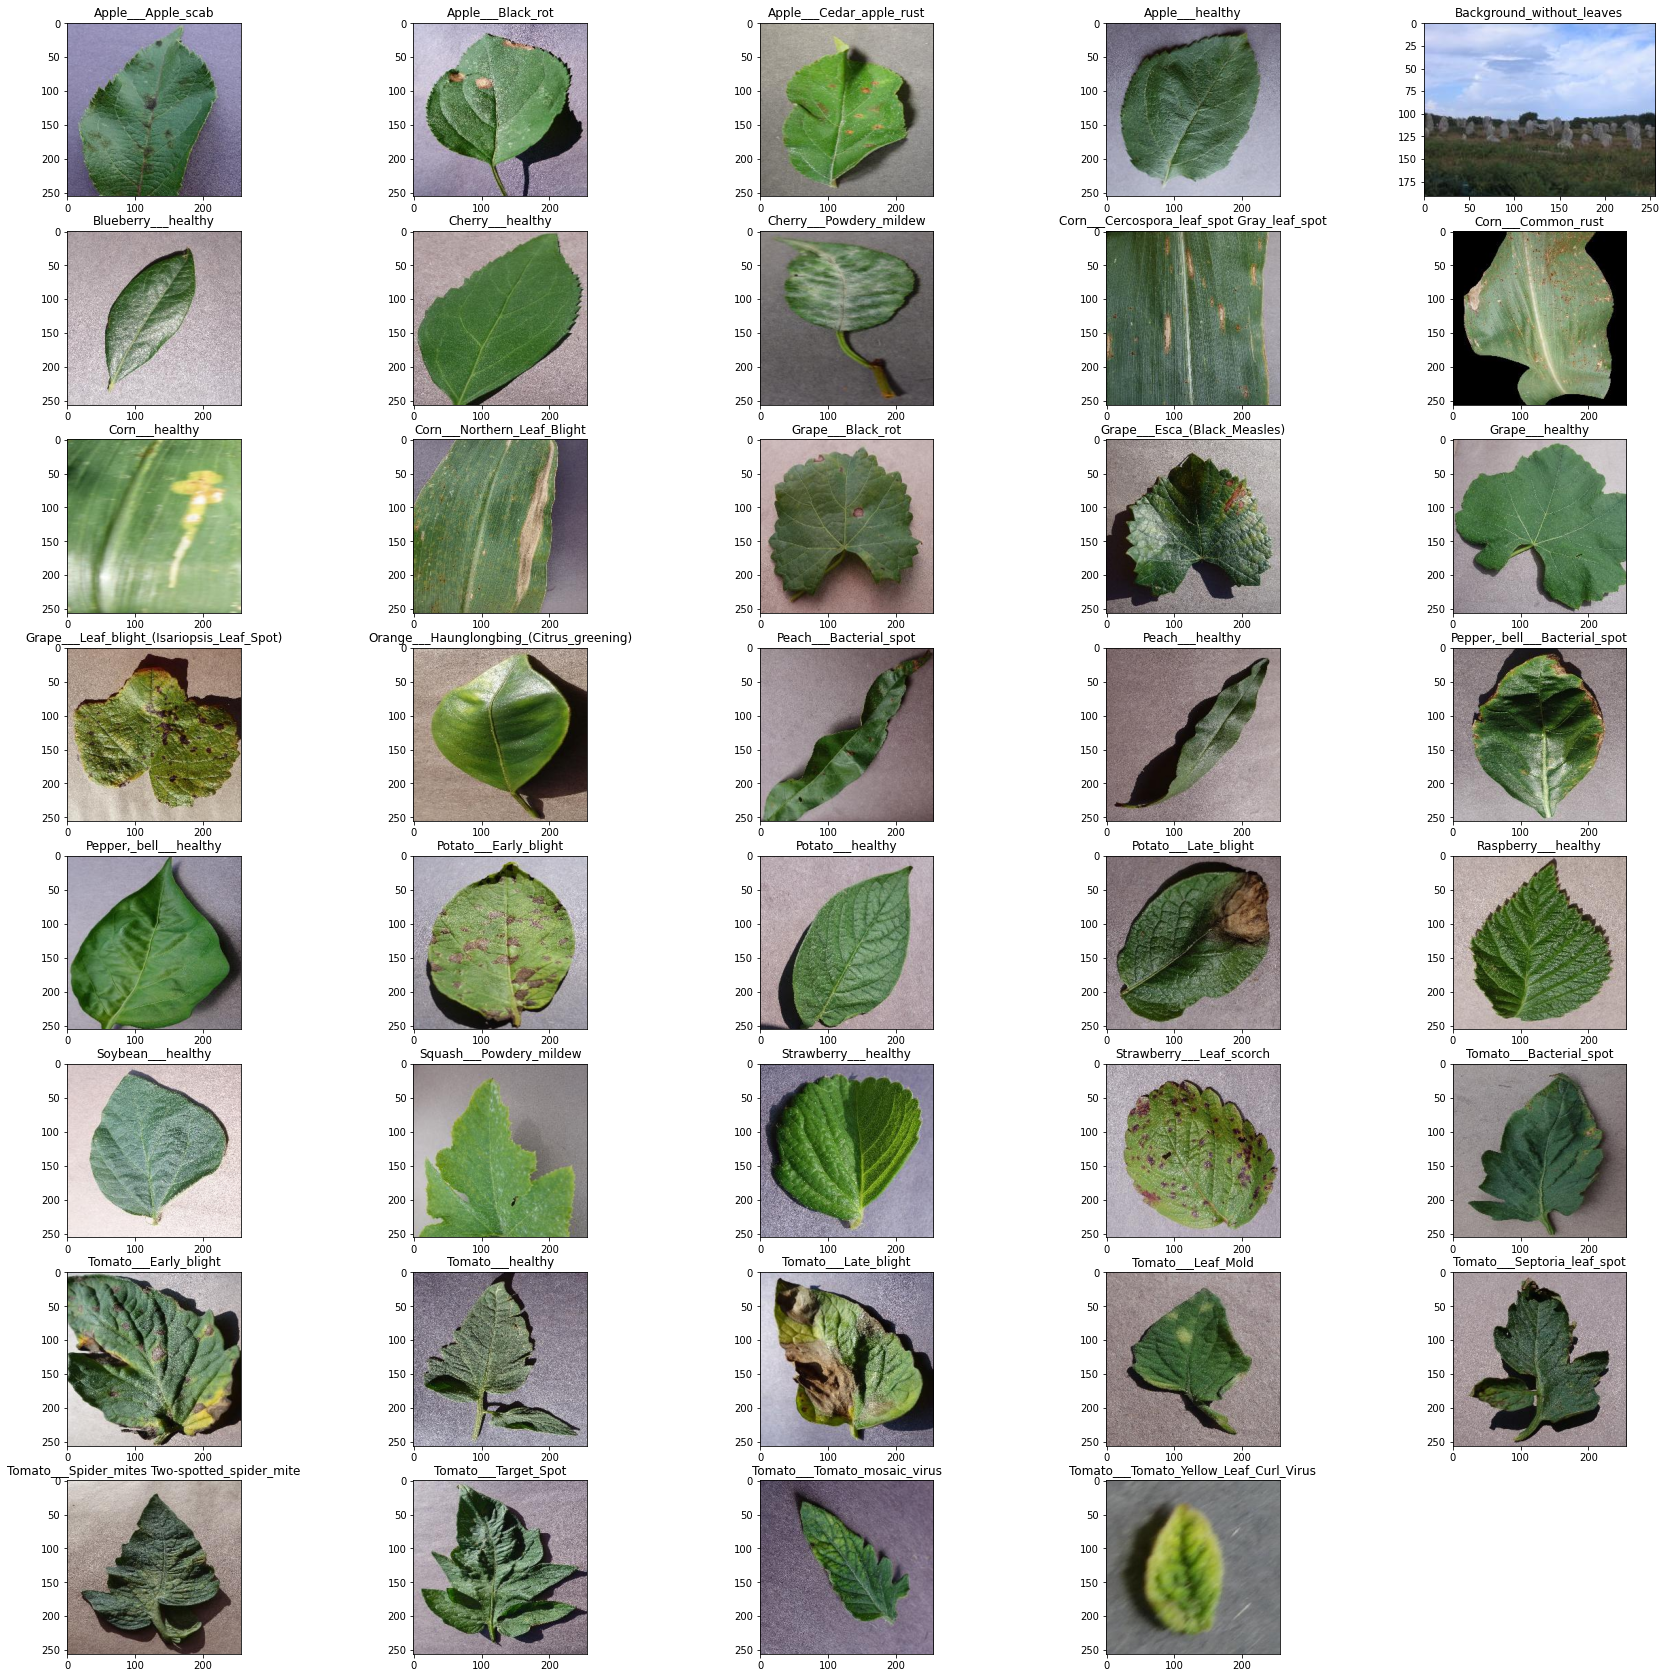

In [5]:
classes = os.listdir(root_dir)
plt.figure(figsize=(30, 30))
for i in range(39):
    plt.subplot(8, 5, i + 1)
    temp_images = os.listdir(os.path.join(root_dir, classes[i]))
    img = plt.imread(os.path.join(root_dir, classes[i] ,temp_images[5]))
    plt.title(classes[i])
    plt.imshow(img)
plt.show()

In [3]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

In [4]:
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='../data/leaf_disease',
                                                 shuffle=True,
                                                 target_size=(150,150), 
                                                 subset="training",
                                                 class_mode='categorical')

test_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='../data/leaf_disease',
                                                 shuffle=True,
                                                 target_size=(150,150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 44371 images belonging to 39 classes.
Found 11077 images belonging to 39 classes.


In [5]:
train_dataset.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Background_without_leaves': 4,
 'Blueberry___healthy': 5,
 'Cherry___Powdery_mildew': 6,
 'Cherry___healthy': 7,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8,
 'Corn___Common_rust': 9,
 'Corn___Northern_Leaf_Blight': 10,
 'Corn___healthy': 11,
 'Grape___Black_rot': 12,
 'Grape___Esca_(Black_Measles)': 13,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
 'Grape___healthy': 15,
 'Orange___Haunglongbing_(Citrus_greening)': 16,
 'Peach___Bacterial_spot': 17,
 'Peach___healthy': 18,
 'Pepper,_bell___Bacterial_spot': 19,
 'Pepper,_bell___healthy': 20,
 'Potato___Early_blight': 21,
 'Potato___Late_blight': 22,
 'Potato___healthy': 23,
 'Raspberry___healthy': 24,
 'Soybean___healthy': 25,
 'Squash___Powdery_mildew': 26,
 'Strawberry___Leaf_scorch': 27,
 'Strawberry___healthy': 28,
 'Tomato___Bacterial_spot': 29,
 'Tomato___Early_blight': 30,
 'Tomato___Late_blight': 31,
 'Tomato__

In [6]:
train_dataset.image_shape

(150, 150, 3)

In [7]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5,5), padding='SAME', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(39, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
trained_model = model.fit(train_dataset, epochs = 10)

Epoch 1/10
1387/1387 [==============================] - 456s 326ms/step - loss: 1.8095 - accuracy: 0.4953
Epoch 2/10
1387/1387 [==============================] - 240s 173ms/step - loss: 0.8277 - accuracy: 0.7494
Epoch 3/10
1387/1387 [==============================] - 428s 309ms/step - loss: 0.5909 - accuracy: 0.8185
Epoch 4/10
1387/1387 [==============================] - 264s 190ms/step - loss: 0.4462 - accuracy: 0.8611
Epoch 5/10
1387/1387 [==============================] - 216s 156ms/step - loss: 0.3688 - accuracy: 0.8858
Epoch 6/10
1387/1387 [==============================] - 208s 150ms/step - loss: 0.3156 - accuracy: 0.9025
Epoch 7/10
1387/1387 [==============================] - 212s 153ms/step - loss: 0.2642 - accuracy: 0.9194
Epoch 8/10
1387/1387 [==============================] - 207s 149ms/step - loss: 0.2397 - accuracy: 0.9263
Epoch 9/10
1387/1387 [==============================] - 210s 151ms/step - loss: 0.2114 - accuracy: 0.9365
Epoch 10/10
1387/1387 [=======================

In [10]:
loss, acc = trained_model.evaluate(test_dataset)
print(loss)
print(acc*100, "%", sep="")

347/347 [==============================] - 277s 799ms/step - loss: 0.4279 - accuracy: 0.8838
0.42789968848228455
88.38133215904236%
